 <h1><center>Handwritten Number Recognition using MNIST dataset</center></h1>

### Importing Libraries

In [2]:
# Import necessary libraries
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

     ------------------------------------ 284.1/284.1 MB 952.1 kB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.7 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.3 MB/s eta 0:00:00
     -------------------------------------- 440.7/440.7 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 938.6/938.6 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 1.7 MB/s eta 0:00:00
     -------------------------------------- 183.3/183.3 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 2.3 MB/s eta 0:00:00


In [39]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [40]:
# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Implementing keras sequential model

In [41]:
# Build the neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilation

In [42]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Training

In [43]:
# Train the model
final=model.fit(train_images, train_labels, epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2873 - accuracy: 0.9161 - val_loss: 0.1552 - val_accuracy: 0.9551
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1243 - accuracy: 0.9629 - val_loss: 0.1099 - val_accuracy: 0.9679
Epoch 3/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0851 - accuracy: 0.9743 - val_loss: 0.1010 - val_accuracy: 0.9693
Epoch 4/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0628 - accuracy: 0.9807 - val_loss: 0.0983 - val_accuracy: 0.9693
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0496 - accuracy: 0.9847 - val_loss: 0.0940 - val_accuracy: 0.9716
Epoch 6/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0374 - accuracy: 0.9891 - val_loss: 0.0877 - val_accuracy: 0.9735
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0295 - accuracy: 0.9916 - val_loss: 0.0859 - val_accuracy:

# Test

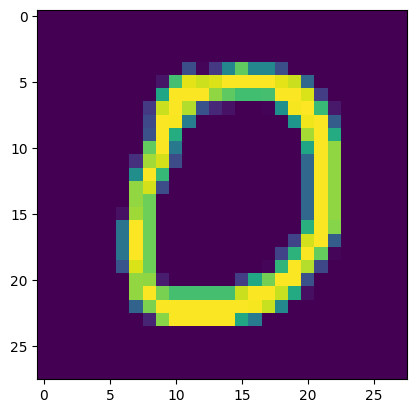

In [51]:
plt.imshow(test_images[10])

In [59]:
value=model.predict(test_images[10].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 13ms/step


# Output

In [61]:
### predicted value by our model
print(value)

[0]


# Accuracy

In [45]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 0s 886us/step - loss: 0.1537 - accuracy: 0.9787
Test accuracy: 97.87%


In [46]:
# Make predictions
predictions = model.predict(test_images)

313/313 [==============================] - 0s 787us/step


# Validation Plot

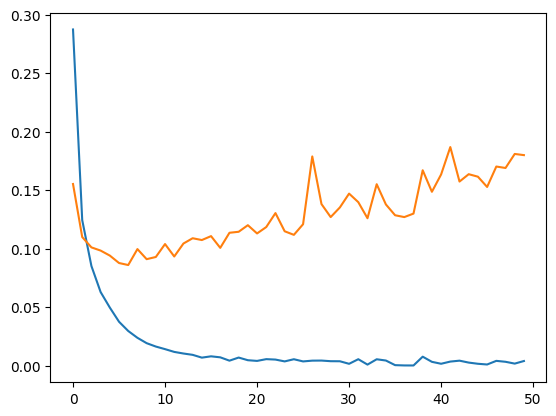

In [47]:
# plotting loss,validation_loss
plt.plot(final.history['loss'])
plt.plot(final.history['val_loss'])

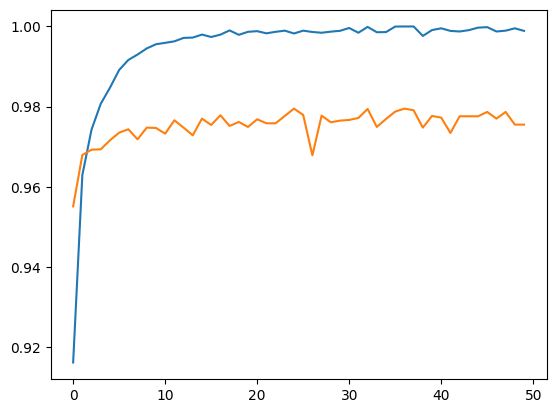

In [48]:
#plot accuracy
plt.plot(final.history['accuracy'])
plt.plot(final.history['val_accuracy'])

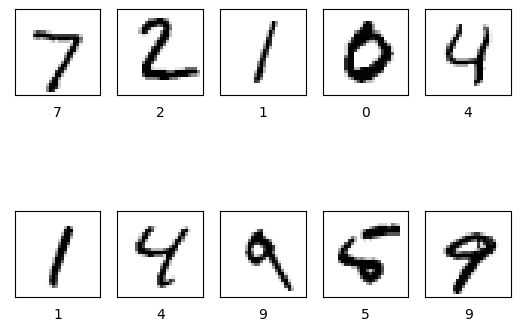

In [62]:
# Visualize some predictions
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predictions[i]))
    plt.xticks([])
    plt.yticks([])

plt.show()